# Pylift Used on basic dataset

In [37]:
import numpy as np, matplotlib as mpl, matplotlib.pyplot as plt, pandas as pd
from pylift import TransformedOutcome
from sklift.metrics import auqc, auuc, uplift_at_k
from sklift.viz import plot_uplift_preds, plot_uplift_qini_curves
import seaborn as sns
sns.set(style="white") # white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

In [38]:
%matplotlib inline

In [39]:
filepath = '/nas/isg_prodops_work/stemr/2020/2020_03 - Capstone Project/'
basic_df = pd.read_csv(filepath + 'opossum_sim_basic.csv')

In [40]:
basic_df2 = basic_df.drop(['response_cont','true_lift','response_cont_prior','conversion','segments'],axis=1)

In [41]:
up = TransformedOutcome(basic_df2, col_treatment='exposed', col_outcome='conversion_post')

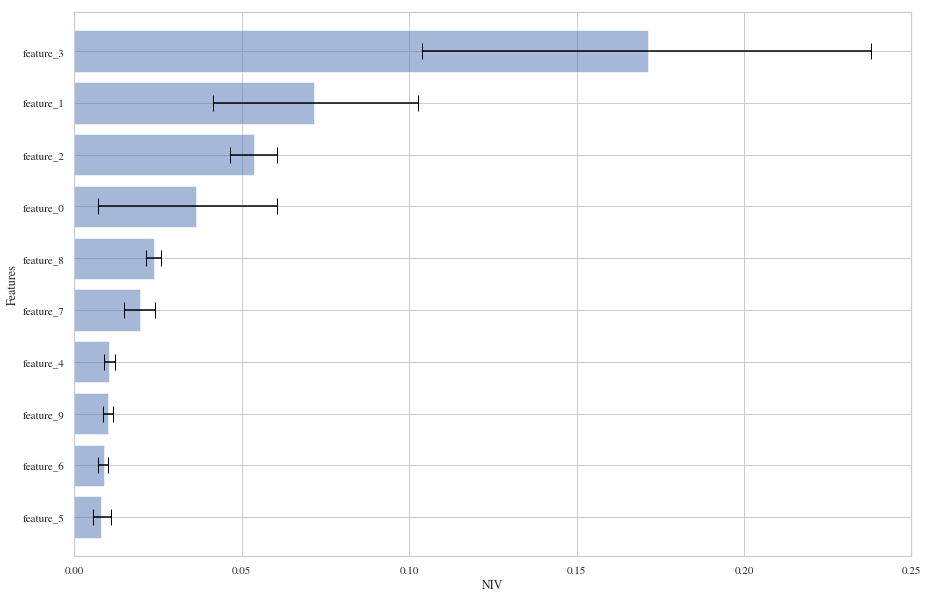

In [42]:
up.NIV()

In [43]:
basic_df2 = basic_df.drop(['feature_0'],axis=1)

In [45]:
up.randomized_search(n_iter=150, n_jobs=10, random_state=847)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:   31.7s
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed:  3.3min
[Parallel(n_jobs=10)]: Done 268 tasks      | elapsed:  7.0min
[Parallel(n_jobs=10)]: Done 492 tasks      | elapsed: 14.0min
[Parallel(n_jobs=10)]: Done 750 out of 750 | elapsed: 20.7min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=1,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                                                      16, 17, 18, 19, 20],
                                        'min_child_weight': [1, 2, 3, 4, 5, 6,
                                  

In [46]:
up.rand_search_.best_params_

{'colsample_bytree': 0.6842944153184551,
 'gamma': 6.675611148908807,
 'max_depth': 3,
 'min_child_weight': 471,
 'n_estimators': 80,
 'subsample': 0.6184677794789324}

In [47]:
up.fit(**up.rand_search_.best_params_)

[20:50:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [60]:
test_df = pd.merge(up.x_test,up.y_test, left_index=True, right_index=True)
basic_df2 = basic_df2[['exposed','true_lift','segments']]
test_df = pd.merge(test_df, basic_df2, left_index=True, right_index=True) 

test_df = test_df.reset_index(drop=True)
test_df = pd.merge(test_df,pd.DataFrame(up.transformed_y_test_pred, columns=['pylift_pred']), left_index=True, right_index=True)

In [61]:
pred_df = test_df

In [62]:
pred_df

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,conversion_post,exposed,true_lift,segments,pylift_pred
0,0.0,1.0,0.0,0.0,-0.496507,0.442057,-0.149994,2.584903,1.881125,0.074831,1,0,0.000000,sure_thing,0.366071
1,1.0,1.0,1.0,0.0,-2.457679,-2.683104,-0.219340,-4.499664,-0.243385,-3.463586,0,0,0.000000,lost_cause,0.447721
2,0.0,1.0,1.0,0.0,0.333731,1.372002,1.095483,-0.783275,-0.431675,2.969524,1,1,0.258551,sure_thing,0.273362
3,0.0,0.0,1.0,1.0,3.038667,1.698522,1.441571,-4.751561,-2.249797,-0.940625,1,1,1.197732,persuadable,0.246558
4,1.0,1.0,1.0,0.0,-1.816237,-1.017376,0.440141,-4.236546,-1.260146,-1.201103,0,0,0.000000,lost_cause,0.364457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,1.0,1.0,-0.496014,0.622510,2.874237,-1.803647,-1.046148,-1.544987,1,1,1.863746,persuadable,0.395995
9996,1.0,0.0,1.0,1.0,0.771415,1.250149,-0.293824,-1.762789,-0.630494,0.847630,1,1,1.911093,persuadable,0.296292
9997,1.0,1.0,0.0,1.0,1.331851,-0.947111,0.815406,-0.028434,-0.330865,-2.190813,1,0,0.000000,sure_thing,0.204727
9998,0.0,0.0,1.0,0.0,-0.531919,0.699788,-1.900794,3.534915,0.680192,2.941906,1,0,0.000000,sure_thing,0.197600


In [63]:
pred_df['random_prediction'] = pd.DataFrame(np.random.uniform(-1,1,size=len(pred_df['feature_0'])))
pred_df = pred_df.sample(5000,random_state=847).reset_index(drop=True)

In [1]:
my_pal = {"sure_thing": "#4d73ff", "lost_cause": "#dbd7d7", "persuadable":"#d93b3b", "sleeping_dog":'#ff9d00'}
sns.relplot(x="true_lift", y="random_prediction",
            hue="segments",palette=my_pal, data=pred_df, height=6, aspect=1.2, alpha=0.80);

NameError: name 'sns' is not defined

In [65]:
uplift_at_k(y_true=pred_df['conversion_post'], uplift=pred_df['pylift_pred'], treatment=pred_df['exposed'], k=0.3)

0.29347005625578576

In [66]:
auuc(y_true=pred_df['conversion_post'], uplift=pred_df['pylift_pred'], treatment=pred_df['exposed'])

3580558.8005930823

In [67]:
auqc(y_true=pred_df['conversion_post'], uplift=pred_df['pylift_pred'], treatment=pred_df['exposed'])

1811586.2582988576

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcd347be470>,
      dtype=object)

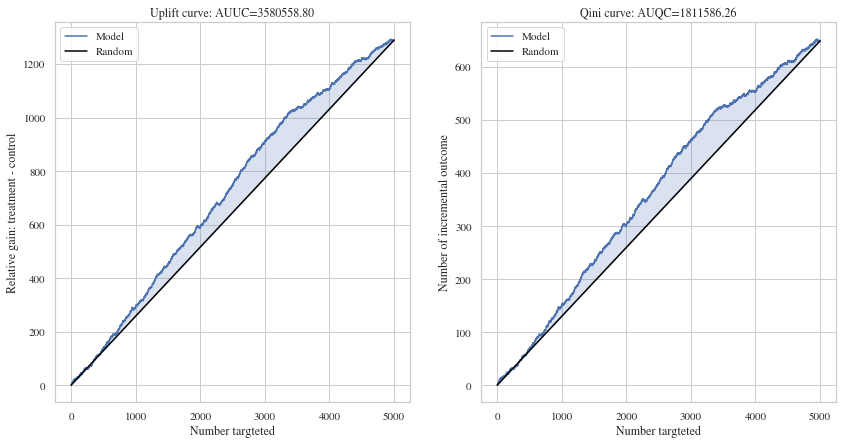

In [68]:
plot_uplift_qini_curves(y_true=pred_df['conversion_post'], uplift=pred_df['pylift_pred'], treatment=pred_df['exposed'])

In [69]:
##Assumptions 
budget = 1000 #budget per 5,000 customers
conversion_profit = 100 #Typical profit generated from a sale
cost_per_ad = 4 #cost to treat a customer with an advertisment
treatment_total = int(budget/cost_per_ad)

random_df = pred_df[pred_df["exposed"] == 1].sample(treatment_total,random_state=847)
prediction_df = pred_df[pred_df["exposed"] == 1].sort_values("pylift_pred",ascending=False).head(treatment_total)

random_p_count = random_df[random_df['segments']=='persuadable']['conversion_post'].sum()
prediction_p_count = prediction_df[prediction_df['segments']=='persuadable']['conversion_post'].sum()
if treatment_total <= pred_df[pred_df['segments']=='persuadable']['conversion_post'].sum():
    perfect_p_count = treatment_total
else:
    perfect_p_count = pred_df[pred_df['segments']=='persuadable']['conversion_post'].sum()
    
    
random_roi = (random_p_count*conversion_profit)- budget
prediction_roi = (prediction_p_count*conversion_profit)- budget
perfect_roi = (perfect_p_count*conversion_profit)- budget
        
print('Treatment Total: {:0,.0f}'.format(treatment_total))
print('Random ROI: ${:0,.0f}'.format(random_roi))
print('Model ROI: ${:0,.0f}'.format(prediction_roi))
print('Perfect ROI: ${:0,.0f}'.format(perfect_roi))

print('Improvement from random: {:.2f}%'.format(((prediction_roi-random_roi)/random_roi)*100))
print('Incremental conversions from random: {}'.format(prediction_p_count-random_p_count))
print('Model to perfect ratio: {:.2f}%'.format((prediction_roi/perfect_roi)*100))

Treatment Total: 250
Random ROI: $6,000
Model ROI: $6,600
Perfect ROI: $24,000
Improvement from random: 10.00%
Incremental conversions from random: 6
Model to perfect ratio: 27.50%


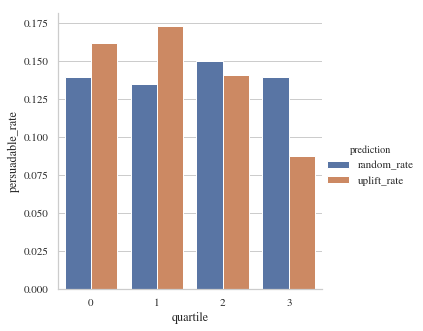

In [72]:
Pyli